# Final Project : Analisis dan Klasifikasi Data Abalone

<b> Kelas Sore Big Data </b>

Oleh : Zakia Firdha Razak

Data : Abalone Dataset

Data Source : https://www.kaggle.com/rodolfomendes/abalone-dataset or https://archive.ics.uci.edu/ml/datasets/Abalone

## Deskripsi Pengerjaan

Dalam notebook ini akan dikerjakan analisis data terhadap Abalone Dataset, yang versi originalnya dipublikasikan di UCI Machine Learning Repository dan dapat diakses di https://archive.ics.uci.edu/ml/datasets/Abalone. Dalam analisis ini akan coba dipahami tentang atribut-atribut dataset, begitu pula keterkaitan antar atribut tersebut.

Beberapa yang akan dibahas dalam pengerjaan ini adalah:

- Menjelaskan apa itu abalone
- Menampilkan dataset abalone beserta atribut-atributnya
- Membuat analisis berdasarkan atribut-atribut tersebut
- Mencari korelasi antar atribut dan bagaimana hal tersebut mempengaruhi hasil
- Menyimpulkan hasil analisis data
- Membuat klasifikasi dataset abalone berdasarkan kategori tertentu dengan menggunakan beberapa model classifier
- Melihat perbandingan akurasi dari masing-masing classifier

## Apa itu Abalone?
Abalon (berasal dari bahasa Spanyol, Abulón) ialah suatu spesies kerang-kerangan (moluska) dari famili Haliotidae dan genus Haliotis. Ia dikenal pula sebagai kerang mata tujuh atau siput balik batu, ormer di Jersey dan Guernsey, perlemoen di Afrika Selatan, dan pāua di Selandia Baru.

Abalon tergolong dalam kelas Gastropoda yang besar. Terdapat hanya satu genus dalam famili Haliotidae dan kira-kira 4 - 7 subgenus. Taksonominya agak membingungkan. Spesiesnya berjumlah antara kira-kira 100 hingga 130 (karena adanya hibrida).

Abalon memiliki ciri-ciri permukaan kulit sebelah dalam yang berwarna-warni yang terbuat dari nakre. Daging moluska ini dianggap sebagai salah satu makanan istimewa di sebagian Amerika Latin (khususnya Chili), Asia Tenggara, dan Asia Timur (khususnya di Republik Rakyat Tiongkok, Jepang, dan Korea).

<i>Sumber : https://id.wikipedia.org/wiki/Abalon</i>

## Dataset Abalone & Detail Fitur
Masalah yang dirumuskan sebenarnya adalah estimasi umur abalone, yang mana dapat ditentukan dari jumlah cincin yang ada dalam cangkang. Bagaimanapun juga, menghitung jumlah cincin secara manual adalah metode yang merepotkan karena cincin tersebut berukuran mikroskopik. Oleh karena itu, salah satu solusi yang memungkinkan untuk memprediksi jumlah cincin adalah menghitungnya berdasarkan ciri-ciri abalone seperti pengukuran tinggi, diameter, panjang, serta berat abalone. Dataset abalone terdiri dari atribut-atribut berikut ini:
- Sex : M (male atau jantan), F (female atau betina), dan I (infant atau bayi)
- Length: Pengukuran cangkang terpanjang (dalam mm)
- Diameter: Diameter cangkang (dalam mm)
- Height: Tinggi abalone saat daging masih di dalam cangkang (dalam mm)
- Whole weight: Berat abalone keseluruhan (dalam gram)
- Shucked weight: Berat dagingnya saja (dalam gram)
- Viscera weight: Berat jeroan setelah darah dikeluarkan (dalam gram)
- Shell weight: Berat abalone setelah dikeringkan (dalam gram)
- Rings: +1.5 merepresentasikan umur dalam tahun (dalam tahun)

## Data Preparing & Data Cleaning 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import s3fs

In [2]:
# Baca dataset
s3 = s3fs.S3FileSystem()
s3.ls('dts-fga-bda')

with s3.open('dts-fga-bda/abalone.csv') as f:
    data = pd.read_csv(f)
    
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Karena Rings: +1.5 merepresentasikan umur dalam tahun, maka 'Rings' akan direplace dengan 'Age'

In [3]:
# Mengganti kolom "Rings" menjadi "Age" dengan nilai yang sudah disesuaikan
data['Age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Memahami data beserta fitur-fiturnya

In [4]:
# Ingin tahu jumlah obs dan features dari data abalone
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))

This dataset has 4177 observations with 9 features.


In [5]:
# Ingin tahu nama-nama kolomnya
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

Ternyata nama kolom masih ada spasi, hal ini agak mengganggu saat melakukan pengolahan data. Maka spasi diganti jadi underscore.

In [6]:
# Ubah nama kolom agar tidak ada spasinya karena nanti akan diolah (sebenarnya bisa pakai re)
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Age']

In [7]:
# Ingin tahu informasi tentang dataframenya
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_weight      4177 non-null float64
Shucked_weight    4177 non-null float64
Viscera_weight    4177 non-null float64
Shell_weight      4177 non-null float64
Age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


Yang diperoleh dari informasi di atas :
- Tidak ada data yang null
- Total jumlah baris : 4177
- Total jumlah kolom : 9
- Fitur kategorikal : Sex
- Fitur numerik/kuantitatif : Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight, Rings

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90bdcb5a58>,
      dtype=object)

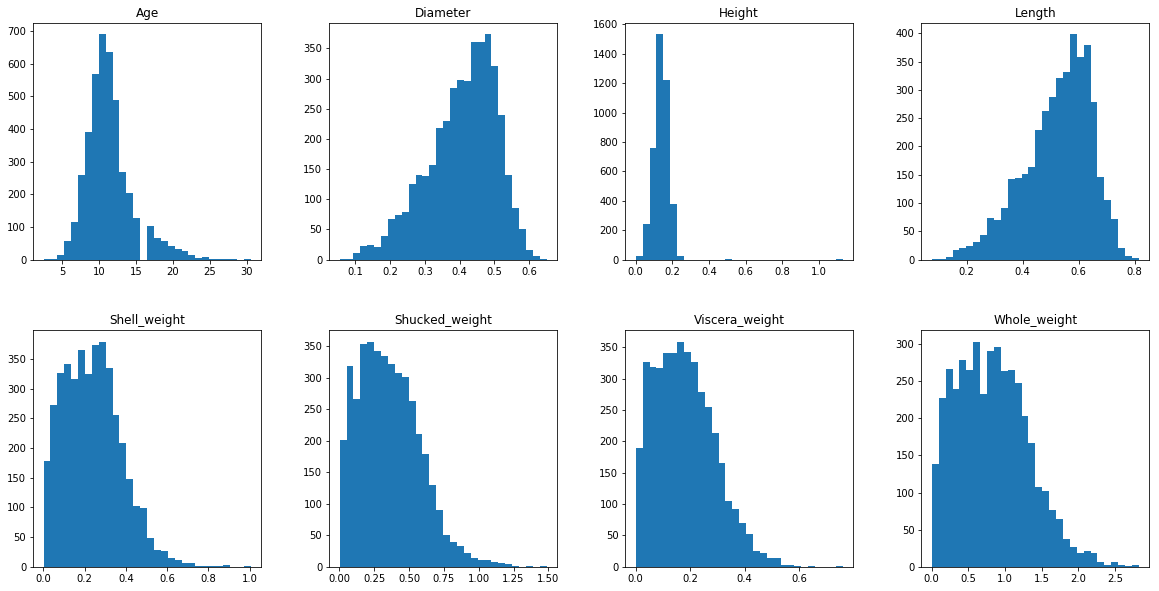

In [8]:
# Ingin melihat histogram dari tiap fitur
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [9]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

In [10]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Age'],
      dtype='object')

In [11]:
categorical_features

Index(['Sex'], dtype='object')

In [12]:
# Mengkonfirmasi missing values yang sebenarnya sudah didapat saat ingin mengetahui informasi dataframe
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Age,0,0.0
Shell_weight,0,0.0
Viscera_weight,0,0.0
Shucked_weight,0,0.0
Whole_weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


Ternyata benar, tidak ada missing values

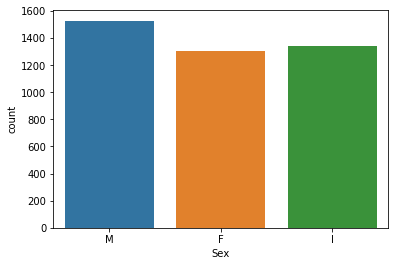

In [13]:
# Visualisasi fitur kategorikal yang hanya satu, yaitu 'Sex'
sns.countplot(data['Sex'],label="Count")
plt.show()

In [14]:
# Ingin tahu perbandingan jumlah berdasarkan kategorinya (M, F, I) lalu diurutkan dari rerata fitur numerik terkecil
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Age']].mean().sort_values('Age')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


In [15]:
# Ingin melihat deskripsi data
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Insight yang didapat setelah mencoba memahami data :
- Terkonfirmasi bahwa tidak ada missing values pada dataset
- Semua fitur adalah numerik, kecuali 'Sex' yang mana kategorikal
- Walaupun fitur-fiturnya tidak terdistribusi normal, akan tetapi mendekati atau cenderung pada normalitas
- Tidak ada fitur yang memiliki nilai minimum = 0, kecuali 'Height'
- Setiap fitur memiliki perbedaan scale range

Kecurigaan :
- Karena ada data yang bernilai 0, yaitu 'Height', maka hal ini aneh karena tinggi adalah salah satu parameter dimensi
- 'Shucked_weight' memiliki nilai, tetapi 'Sex' memang memiliki kategori 'Infant', jadi mungkin saja bayi abalone memang benar-benar memiliki tinggi 0 mm

In [16]:
# Mengecek baris dengan height = 0 
data.loc[data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


In [17]:
#  Hitung jumlah baris dan presentase abalone memiliki height = 0
print("No. of rows with height == 0 is {}".format((data['Height'] == 0).sum()))
print("Percentage of rows with height == 0 is {0:.4f}%".format(((data['Height'] == 0).sum() * 100 )/len(data)))

No. of rows with height == 0 is 2
Percentage of rows with height == 0 is 0.0479%


In [18]:
# Karena yang punya height = 0 hanya 2, maka data tersebut akan dihapus saja
data = data[data['Height'] != 0]

In [19]:
# Konfirmasi data dengan height = 0
print("No. of rows with height == 0 is {}".format((data['Height'] == 0).sum()))

No. of rows with height == 0 is 0


Sudah tidak ada data abalone yang memiliki height = 0

## Nomor 1: Berdasarkan dataset yang dipilih, buatlah Scatter Plot untuk masing-masing features [Score: 15]

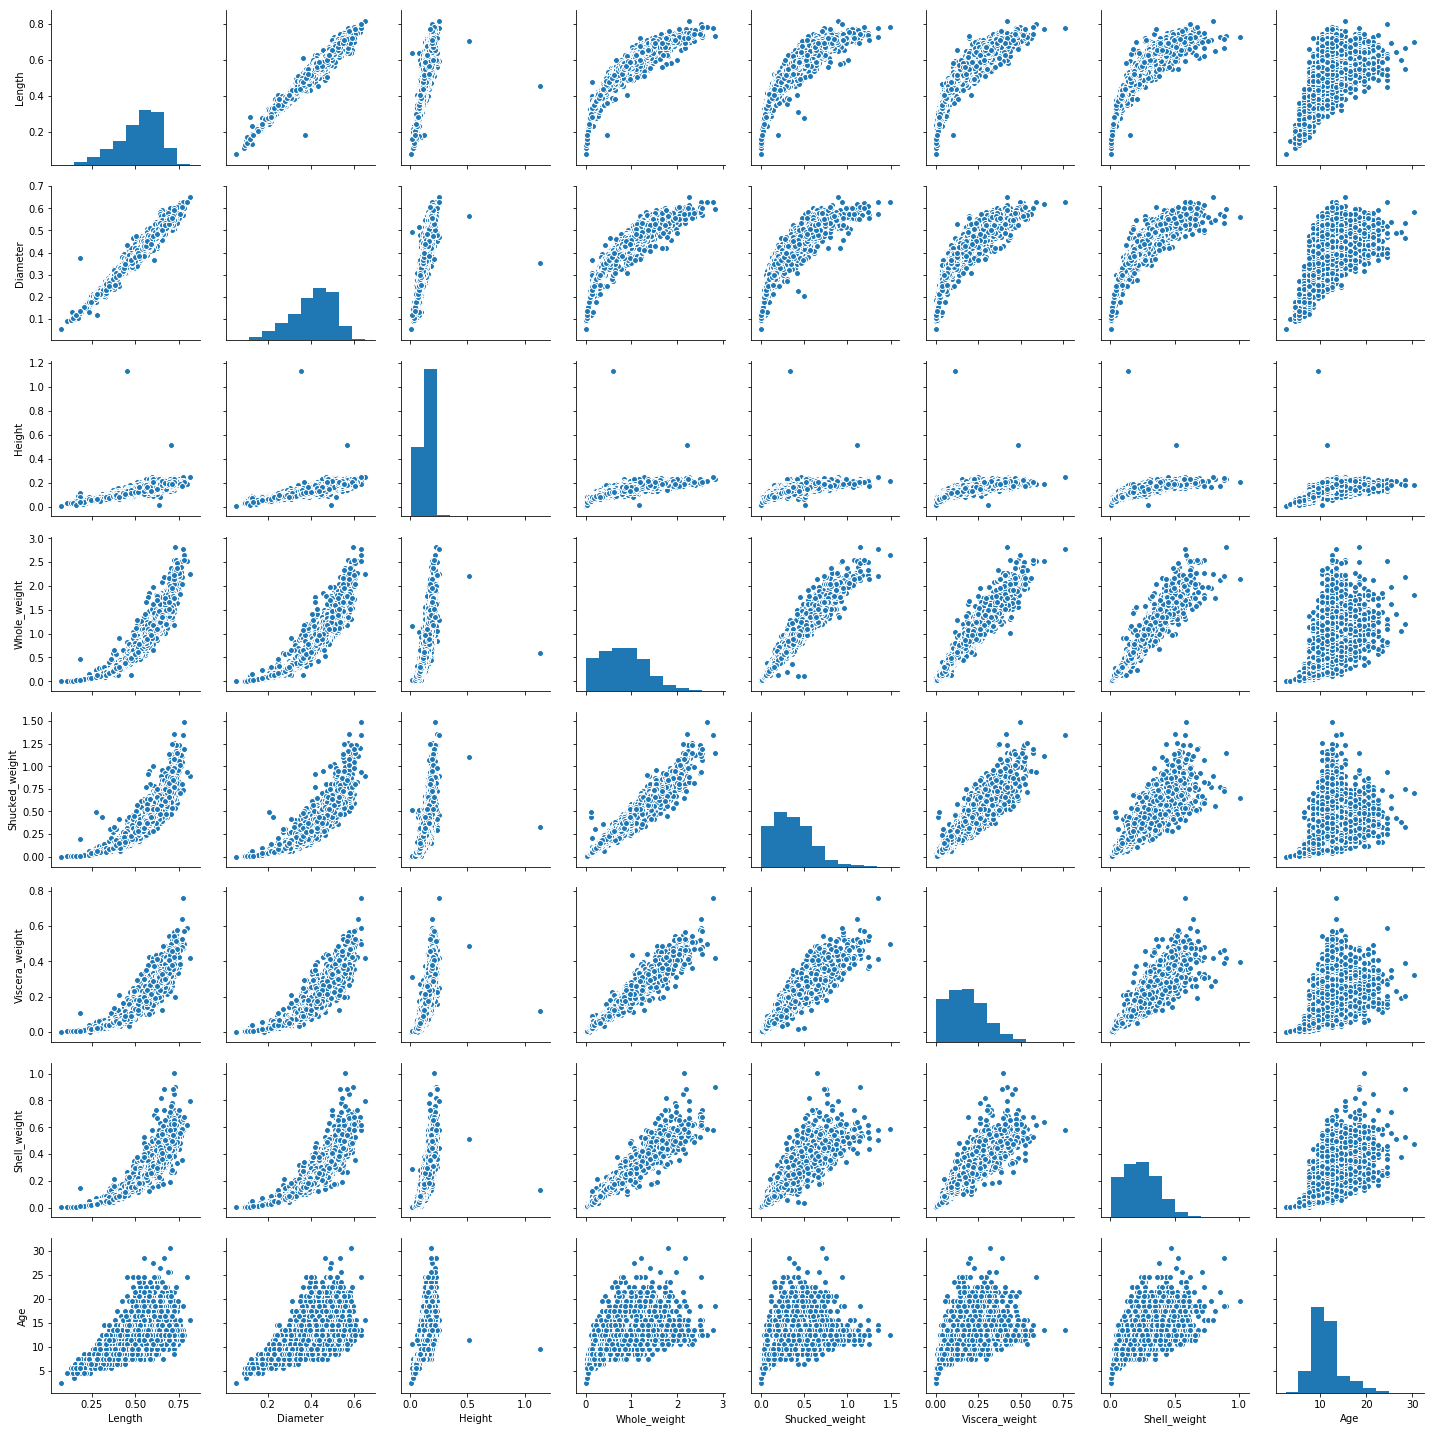

In [20]:
sns.pairplot(data[numerical_features])

## Nomor 2 : Berdasarkan pola data dari scatter plot (No. 1), pilih 2 features yang memiliki dugaan kuat ada korelasi. Narasikan alasannya! [Score: 10]

Insight yang didapat dari scatter plot (No. 1), yaitu bahwa 2 fitur yang memiliki dugaan kuat ada korelasi adalah 'Length' dengan 'Diameter', karena membentuk pola scatter plot yang linear atau bergaris lurus ke arah kanan atas. Hal ini berarti apabila nilai 'Length' naik, maka nilai 'Diameter' juga naik, begitu pula sebaliknya.

Dugaan korelasi juga ditemukan di fitur lain, namun tidak sekuat korelasi 'Length' dan 'Diameter'. Salah satu contohnya adalah fitur 'Length' berkorelasi dengan 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', dan 'Shell_weight', hanya saja hubungannya tidak terlalu linear, atau non-linear.

Untuk mendukung dugaan ini, akan coba diplotkan heatmap sebagai berikut :

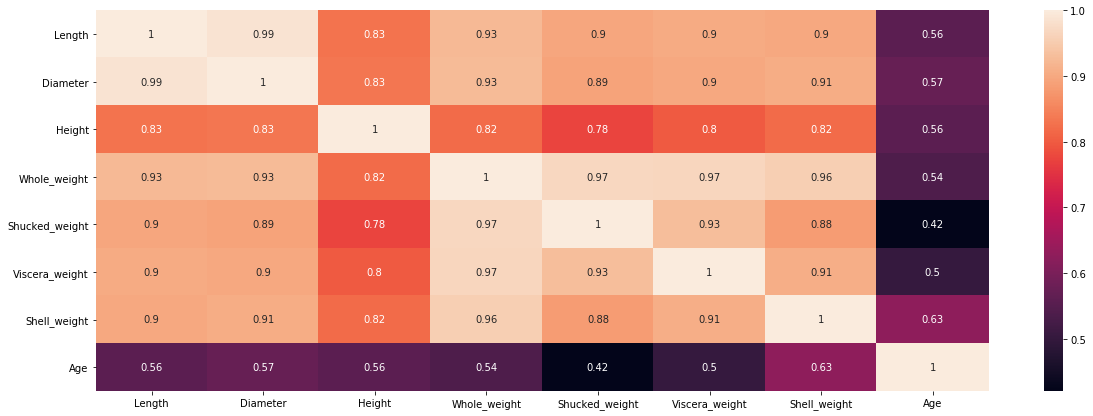

In [21]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

Koefesien korelasi ialah pengukuran statistik kovarian atau asosiasi antara dua variabel. Besarnya koefesien korelasi berkisar antara +1 s/d -1. Koefesien korelasi menunjukkan kekuatan (strength) hubungan linear dan arah hubungan dua variabel acak. Jika koefesien korelasi positif, maka kedua variabel mempunyai hubungan searah. Artinya jika nilai variabel X tinggi, maka nilai variabel Y akan tinggi pula. Sebaliknya, jika koefesien korelasi negatif, maka kedua variabel mempunyai hubungan terbalik. Artinya jika nilai variabel X tinggi, maka nilai variabel Y akan menjadi rendah dan berlaku sebaliknya. Untuk memudahkan melakukan interpretasi mengenai kekuatan hubungan antara dua variabel penulis memberikan kriteria sebagai berikut (Sarwono:2006):
-  0 : Tidak ada korelasi antara dua variabel
- .>0 – 0,25 : Korelasi sangat lemah
- .>0,25 – 0,5 : Korelasi cukup
- .>0,5 – 0,75 : Korelasi  kuat
- .>0,75 – 0,99 : Korelasi  sangat kuat
-  1 : Korelasi sempurna

<h4>Berdasarkan kriteria di atas, ternyata benar bahwa korelasi antara fitur 'Length' dan 'Diameter' sangat kuat, dengan koefisien korelasi mencapai 0.99 atau mendekati 1</h4>Adapun untuk fitur-fitur lain juga dapat dilihat nilai koefisien korelasinya dari heatmap di atas.

<h2>Nomor 3 : Buatlah statistik deskriptif dari beberapa 2 features yang dipilih. Berikan narasi terhadap statistik tersebut [Score: 20]</h2>

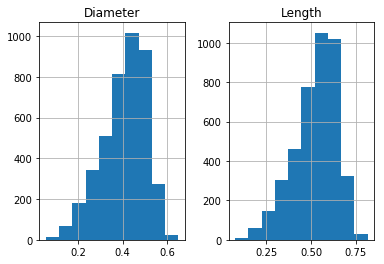

In [22]:
# Histogram
viz = data[['Length','Diameter']]
viz.hist()
plt.show()

Berdasarkan histogram dari kedua fitur di atas, dapat dilihat bahwa sebaran data fitur 'Length' dan 'Diameter' hampir sama, dan polanya juga mirip. Namun kedua fitur ini tidak terdistribusi normal sempurna, dilihat dari adanya skewness ke arah kanan. Walaupun begitu, distribusi keduanya mendekati normalitas karena masih membentuk lonceng.

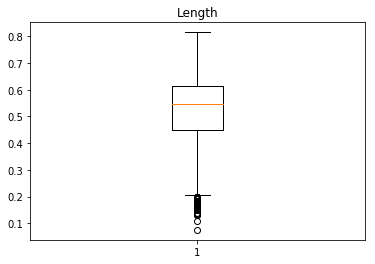

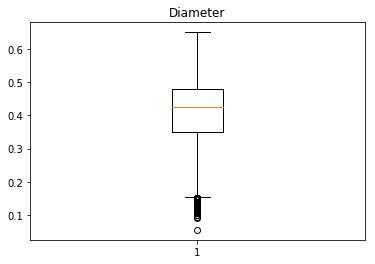

In [23]:
# Box Plot
plt.boxplot(data['Length'])
plt.title("Length")
plt.show()

plt.boxplot(data['Diameter'])
plt.title("Diameter")
plt.show()

Dari kedua box plot di atas, sepintas dapat ditentukan beberapa ukuran statistik, meskipun tidak persis sekali. Adapun nilai statistik pada badan box plot di atas adalah:
- Range data dari fitur 'Length' berkisar antara 0.2 sampai 0.8 (dalam mm), sedangkan untuk range data dari fitur 'Diameter' berkisar antara 0.15 sampai 0.65 (dalam mm)
- Nilai median dari fitur 'Length' ≈ 0.55, sedangkan nilai median dari fitur 'Diameter' ≈ 0.42
- Nilai Q1 dari fitur 'Length' ≈ 0.45, sedangkan nilai Q1 dari fitur 'Diameter' ≈ 0.61
- Nilai Q3 dari fitur 'Length' ≈ 0.35, sedangkan nilai Q3 dari fitur 'Diameter' ≈ 0.48
- Nilai minimum dari fitur 'Length' ≈ 0.2, sedangkan nilai minimum dari fitur 'Diameter' ≈ 0.15
- Nilai maksimum dari fitur 'Length' ≈ 0.8, sedangkan nilai maksimum dari fitur 'Diameter' ≈ 0.65
- Masih ditemukan outliers dari kedua fitur tersebut yang berkisar antara range 0 sampai 0.15 untuk 'Length', dan antara 0 sampai 0.2 untuk 'Diameter'
- Sebaran data tidak simetris, tetapi condong ke arah kanan (positively skewness)

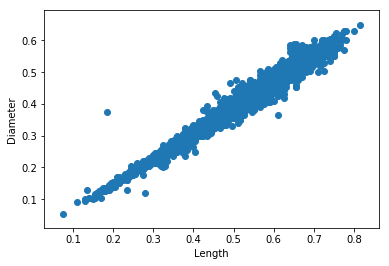

In [24]:
# Scatter plot
plt.scatter(data.Length, data.Diameter)
plt.xlabel("Length")
plt.ylabel("Diameter")
plt.show()

Dalam scatter plot, dapat dilihat sekali lagi bahwa sebaran datanya membentuk garis linear yang berarti jika nilai 'Length' naik maka nilai 'Diameter' juga naik. Disini juga keberadaan outliers terlihat lebih jelas.

## Nomor 4 : Dari 2 features yang dipilih tersebut (No. 3), buatlah analisis model regresi (linear atau nonlinear). Jenis model regresi yang dipilih harus menyesuaikan pola sebaran data dari scatter plot. Model yang telah dibuat harus ditunjukkan secara visual dg grafik, serta tunjukkan tingkat keakuratannya (bisa menggunakan sembarang metrik) [Score: 25]

Dalam regresi ini, akan digunakan model linear karena menyesuaikan persebaran data dari hasil visualisasi di nomor 3

In [25]:
cdata = data[['Length','Diameter']]
cdata.head()

,Length,Diameter
0,0.455,0.365
1,0.350,0.265
2,0.530,0.420
3,0.440,0.365
4,0.330,0.255


In [26]:
msk = np.random.rand(len(cdata)) < 0.8
train = cdata[msk]
test = cdata[~msk]

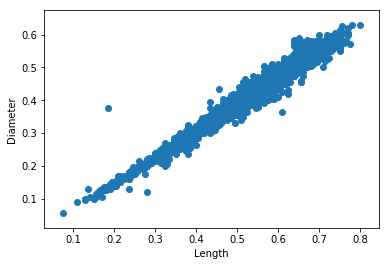

In [27]:
# variabel length (independen)
# variabel independen (dependen)
plt.scatter(train.Length, train.Diameter)
plt.xlabel("Length")
plt.ylabel("Diameter")
plt.show()

In [28]:
# Tentukan b0 dan b1
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Length']])
train_y = np.asanyarray(train[['Diameter']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.81687275]]
Intercept:  [-0.0200725]


Text(0, 0.5, 'Diameter')

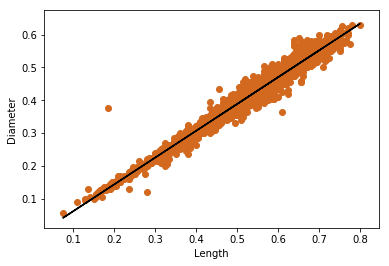

In [29]:
plt.scatter(train.Length, train.Diameter,  color='chocolate')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', color='black')
plt.xlabel("Length")
plt.ylabel("Diameter")

In [30]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Length']])
test_y = np.asanyarray(test[['Diameter']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 0.97


### Regresi pt 2 (Pakai Variabel Target)

Karena sebenarnya linearitas antara fitur 'Length' dan 'Diameter' sangat bisa ditebak bahkan tanpa scatter plot, maka akan dicoba melakukan regresi terhadap 2 fitur lain yang melibatkan variabel target, yaitu 'Age'

In [31]:
ddata = data[['Age','Shell_weight']]
ddata.head()

,Age,Shell_weight
0,16.5,0.150
1,8.5,0.070
2,10.5,0.210
3,11.5,0.155
4,8.5,0.055


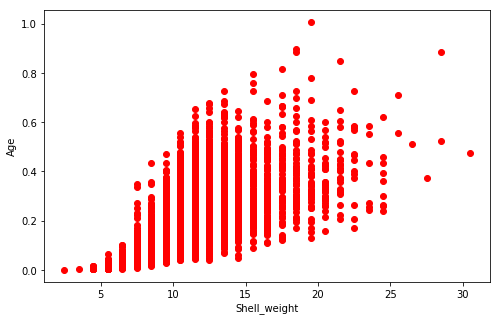

In [32]:
plt.figure(figsize=(8,5))
x_data, y_data = (ddata["Age"].values, ddata["Shell_weight"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Age')
plt.xlabel('Shell_weight')
plt.show()

Yang dapat dilihat dari plot di atas : untuk nilai 'Age' yang lebih kecil maka nilai 'Shell_weight' lebih terkonsentrasi di bawah. Ketika nilai 'Age' bertambah, scatterplot jadi lebih luas, dan untuk nilai tertinggi dari 'Age' jadi lebih berpencar.

 beta_1 linear = -0.070840, beta_2 linear= 0.822801


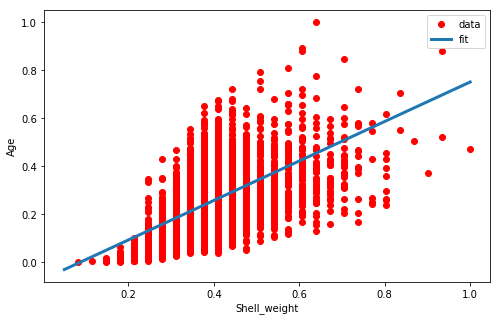

In [33]:
def linear(xl, Beta_1l, Beta_2l):
    yl = Beta_1l+(Beta_2l*xl)
    return yl

# Lets normalize our data (linear)
xdatal =x_data/max(x_data)
ydatal =y_data/max(y_data)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(linear, xdatal, ydatal, maxfev=10000)
#print the final parameters
print(" beta_1 linear = %f, beta_2 linear= %f" % (popt[0], popt[1]))

xl = np.linspace(10, 200, 1000)
xl = xl/max(xl)
plt.figure(figsize=(8,5))
yl = linear(xl, *popt)
plt.plot(xdatal, ydatal, 'ro', label='data')
plt.plot(xl, yl, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Age')
plt.xlabel('Shell_weight')
plt.show()

 beta_1 sigmoid = 3.747981, beta_2 sigmoid = 0.690989


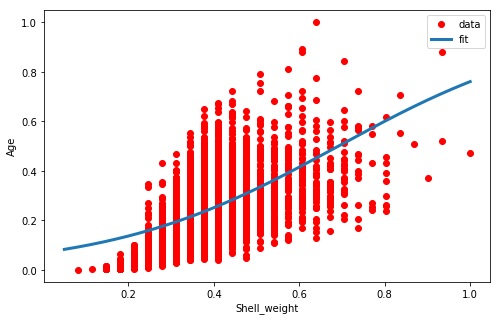

In [34]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

# Lets normalize our data (sigmoid)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 sigmoid = %f, beta_2 sigmoid = %f" % (popt[0], popt[1]))

x = np.linspace(10, 200, 1000)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Age')
plt.xlabel('Shell_weight')
plt.show()

 beta_1 exponential = 0.099882, beta_2 exponential= 2.258304


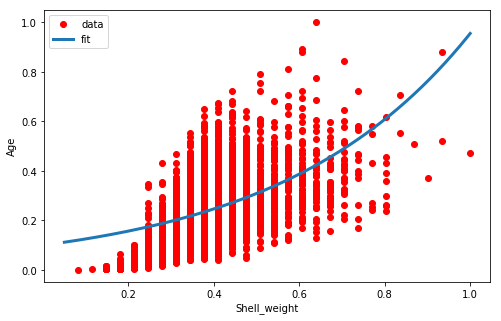

In [35]:
def exponential(xe, Beta_1e, Beta_2e):
    ye = Beta_1e * (np.exp(Beta_2e*xe))
    return ye

# Lets normalize our data (exponential)
xdatae =x_data/max(x_data)
ydatae =y_data/max(y_data)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, xdatae, ydatae,maxfev=10000)
#print the final parameters
print(" beta_1 exponential = %f, beta_2 exponential= %f" % (popt[0], popt[1]))

xe = np.linspace(10, 200, 1000)
xe = xe/max(xe)
plt.figure(figsize=(8,5))
ye = exponential(xe, *popt)
plt.plot(xdatae, ydatae, 'ro', label='data')
plt.plot(xe,ye, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Age')
plt.xlabel('Shell_weight')
plt.show()

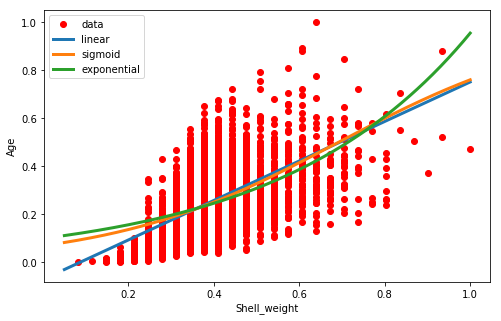

In [36]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(xl, yl, linewidth=3.0, label='linear')
plt.plot(x, y, linewidth=3.0, label='sigmoid')
plt.plot(xe, ye, linewidth=3.0, label='exponential')
plt.legend(loc='best')
plt.ylabel('Age')
plt.xlabel('Shell_weight')
plt.show()

In [37]:
msk = np.random.rand(len(ddata)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt1, pcov = curve_fit(linear, train_x, train_y, maxfev=10000)
popt2, pcov = curve_fit(sigmoid, train_x, train_y, maxfev=10000)
popt3, pcov = curve_fit(exponential, train_x, train_y, maxfev=10000)

# predict using test set
y_hat1 = linear(test_x, *popt1)
y_hat2 = sigmoid(test_x, *popt2)
y_hat3 = exponential(test_x, *popt3)

# evaluation
print("Mean absolute error (MAE) linear : %.2f" % np.mean(np.absolute(y_hat1 - test_y)))
print("Residual sum of squares (MSE) linear : %.2f" % np.mean((y_hat1 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score linear : %.2f\n" % r2_score(y_hat1, test_y))

print("Mean absolute error (MAE) sigmoid : %.2f" % np.mean(np.absolute(y_hat2 - test_y)))
print("Residual sum of squares (MSE) sigmoid : %.2f" % np.mean((y_hat2 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score sigmoid : %.2f\n" % r2_score(y_hat2, test_y))

print("Mean absolute error (MAE) exponential : %.2f" % np.mean(np.absolute(y_hat3 - test_y)))
print("Residual sum of squares (MSE) exponential : %.2f" % np.mean((y_hat3 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score exponential : %.2f" % r2_score(y_hat3, test_y))

Mean absolute error (MAE) linear : 0.09
Residual sum of squares (MSE) linear : 0.01
R2-score linear : -0.48

Mean absolute error (MAE) sigmoid : 0.09
Residual sum of squares (MSE) sigmoid : 0.01
R2-score sigmoid : -0.97

Mean absolute error (MAE) exponential : 0.09
Residual sum of squares (MSE) exponential : 0.01
R2-score exponential : -1.56


Karena R2-score dari ketiga model bernilai negatif, dapat dikatakan bahwa tidak terdapat pengaruh 'Shell_weight' terhadap 'Age'. Mungkin dapat dicoba lagi menggunakan model lain atau melakukan regresi linear berganda. Namun hal tersebut belum dicoba dalam pengerjaan ini.

## Nomor 5 : Terhadap dataset yang diperoleh, lakukan pula analisis berikutnya (pilih salah satu : KLASIFIKASI) [Score: 30]

Analisis yang dipilih adalah klasifikasi dengan berdasarkan satu-satunya fitur kategorikal pada data ini, yaitu 'Sex' atau jenis kelamin. Akan diterapkan berbagai model classifier untuk dibandingkan akurasinya.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score , classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

In [39]:
from pandas.plotting import scatter_matrix
feature_names = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Age']
X = data[feature_names]
y = data['Sex']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.55
Accuracy of Logistic regression classifier on test set: 0.56


In [42]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.50


In [43]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.69
Accuracy of K-NN classifier on test set: 0.51


In [44]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.54
Accuracy of LDA classifier on test set: 0.56


In [45]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.52
Accuracy of GNB classifier on test set: 0.53


In [46]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.54
Accuracy of SVM classifier on test set: 0.55


In [47]:
df = pd.DataFrame({'Classifier':['LR', 'DT', 'KNN', 'LDA', 'GNB', 'SVM'],
                    'Accuracy on training':[logreg.score(X_train, y_train), clf.score(X_train, y_train), knn.score(X_train, y_train), lda.score(X_train, y_train), gnb.score(X_train, y_train), svm.score(X_train, y_train)], 
                    'Accuracy on testing':[logreg.score(X_test, y_test), clf.score(X_test, y_test), knn.score(X_test, y_test), lda.score(X_test, y_test), gnb.score(X_test, y_test), svm.score(X_test, y_test)],
                    'Average accuracy':[(logreg.score(X_train, y_train)+logreg.score(X_test, y_test))/2, (clf.score(X_train, y_train)+clf.score(X_test, y_test))/2, (knn.score(X_train, y_train)+knn.score(X_test, y_test))/2, (lda.score(X_train, y_train)+lda.score(X_test, y_test))/2, (gnb.score(X_train, y_train)+gnb.score(X_test, y_test))/2, (svm.score(X_train, y_train)+svm.score(X_test, y_test))/2,]})
df 

,Classifier,Accuracy on training,Accuracy on testing,Average accuracy
0,LR,0.553817,0.555556,0.554686
1,DT,1.000000,0.496169,0.748084
2,KNN,0.694986,0.514368,0.604677
3,LDA,0.544554,0.560345,0.552450
4,GNB,0.515490,0.529693,0.522592
5,SVM,0.535931,0.553640,0.544785


Dari data di atas, dapat dibandingkan:
- Classifier dengan akurasi pada data training tertinggi adalah Decision Tree yaitu sebesar 100%
- Classifier dengan akurasi pada data training terendah adalah Gussian Naive Bayes yaitu sebesar 51.54%
- Classifier dengan akurasi pada data testing tertinggi adalah Linear Discriminant Analysis yaitu sebesar 56.03%
- Classifier dengan akurasi pada data testing terendah adalah Decision Tree yaitu sebesar 49.55%
- Classifier dengan rata-rata akurasi tertinggi adalah Decision Tree yaitu sebesar 74.76%
- Classifier dengan rata-rata akurasi terendah adalah Gaussian Naive Bayes yaitu sebesar 52.25%

In [48]:
#import plotly.express as px
#fig = px.bar(df, x='Classifier', y='Average accuracy', title='Average Accuracy of Each Classifiers')
#fig.show()

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [50]:
pred = logreg.predict(X_test)
print('logreg')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

pred = clf.predict(X_test)
print('clf')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

pred = knn.predict(X_test)
print('knn')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

pred = lda.predict(X_test)
print('lda')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

pred = gnb.predict(X_test)
print('gnb')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

pred = svm.predict(X_test)
print('svm')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

logreg
[[ 94  55 164]
 [ 16 280  43]
 [ 97  89 206]]
              precision    recall  f1-score   support

           F       0.45      0.30      0.36       313
           I       0.66      0.83      0.73       339
           M       0.50      0.53      0.51       392

   micro avg       0.56      0.56      0.56      1044
   macro avg       0.54      0.55      0.54      1044
weighted avg       0.54      0.56      0.54      1044

clf
[[136  46 131]
 [ 54 217  68]
 [160  67 165]]
              precision    recall  f1-score   support

           F       0.39      0.43      0.41       313
           I       0.66      0.64      0.65       339
           M       0.45      0.42      0.44       392

   micro avg       0.50      0.50      0.50      1044
   macro avg       0.50      0.50      0.50      1044
weighted avg       0.50      0.50      0.50      1044

knn
[[150  34 129]
 [ 54 250  35]
 [193  62 137]]
              precision    recall  f1-score   support

           F       0.38      0